In [ ]:
import numpy as np

class hidden_node:
  def __init__(self, weights=None, parents=None):

    self.weights = []
    try:
      assert type(weights) == np.ndarray, 'input is not correct'
      self.weights.extend(weights)
    except:
      pass

    self.parents = []
    try:
      self.parents.extend(parents)
      self.parents_grads = np.array([0 for i in range(len(parents))])
      self.is_parents = True
    except:
      self.is_parents = False

    self.grads = np.zeros_like(weights)
    


  def forward(self, input):
    '''
      input = numpy.ndarray, size = (d, )
      weights = numpy.ndarray, size = ( , d)
      parent = [w0, w1, w2, ..., x0, x1, x2, ...]
      return weights x input 
    '''
    assert type(input) == np.ndarray, 'input is not correct'

    self.input = input

    return np.matmul(self.weights, input)

  def backward(self, dz):
    '''
      dz = dL / dz
      d = ([dL / dw0, dL / dw1, dL / dw2, ...], 
      [dL / x0, dL / x1, dL / x2 ...])

    '''
    d_w = np.array([dz * x for x in self.input])
    self.grads += d_w
    
    if self.is_parents:
      d_x = np.array([dz * w for w in self.weights])
      #print(d_x + self.parents_grads) #DEBUG
      #print(self.parents_grads) #DEBUG
      self.parents_grads = self.parents_grads + d_x

  def update_weights(self, grad, alpha=0.5):
    assert type(grad) == np.ndarray, 'input is not correct'
    assert_string = f'the length is different {len(weights)} and {len(self.weights)}'
    assert len(grad) == len(self.weights), assert_string
    self.weights = self.weights - alpha * grad



class MSE_node:

  def __init__(self):
    pass

  def loss(self, y_pred, y):
    y_pred = y_pred[0]
    
    self.loss_grad = 2 * (y_pred - y)

    return (y_pred - y) ** 2

  def backward(self):
    dz = self.loss_grad

    return dz

  

In [ ]:
class calculate_grads:
  def __init__(self, layers, loss):
    self.layers = layers
    self.loss = loss
    self.num_params = 0
  
  def set_zero_gradient(self):
    self.gradient = []

  def forward(self, input):
    prev_nums = len(input) 
    for layer in self.layers:
      input = np.array([node.forward(input) for node in layer])
      self.num_params += prev_nums * len(layer)
      prev_nums = len(layer)
      
    return input
      

  def backward(self):
    j = len(self.layers)

    #self.loss.loss(y_pred, y)
    dz = self.loss.backward()

    for layer in self.layers[::-1]:
      #check if first layer
      if j == 1:
        for current_node in layer:
          self.gradient.extend(current_node.grads)
        break
      
      for current_node in layer:
        #set dz for last layer = 1
        if j == len(self.layers):
          current_node.backward(dz)
        #  current_node.parents_grads = np.ones_like(current_node.parents_grads)
        
        self.gradient.extend(current_node.grads)

        for node, dz in zip(current_node.parents, current_node.parents_grads):
          node.backward(dz)

      j -= 1
   
    assert_string = f"len of gradient {len(self.gradient)} doesnt equal to num of params {self.num_params}" 
    assert len(self.gradient) == self.num_params, assert_string

In [ ]:
class network(calculate_grads):

  def train(self, x, y, alpha = 0.5):

    #get grads
    self.set_zero_gradient()

    y_pred = self.forward(x)

    loss_ = self.loss.loss(y_pred, y)

    self.backward()

    #update weights
    i = 0
    for layer in self.layers[::-1]:
      for current_node in layer:
        count_of_weights = len(current_node.weights)
        current_node.update_weights(np.array(self.gradient[i:i + count_of_weights]), alpha=alpha)

        i += count_of_weights

    return loss_

In [ ]:
#testing
input_size = 1
d1 = 6
d2 = 3
d3 = 1
layers = []

x = np.random.randn(input_size)
y = 1

nodes = []
for i in range(d1):
  weights = np.random.randn(input_size)
  nodes.append(hidden_node(weights))
layers.append(nodes)

nodes = []
for i in range(d2):
  weights = np.random.randn(d1)
  nodes.append(hidden_node(weights, [layers[0][j] for j in range(len(layers[0]))]))
layers.append(nodes)

nodes = []
for i in range(d3):
  weights = np.random.randn(d2)
  nodes.append(hidden_node(weights, [layers[0][j] for j in range(len(layers[1]))]))
layers.append(nodes)

#calc_grad = calculate_grads(layers)
loss = MSE_node()

net = network(layers, loss)

#net.train(x)

In [ ]:
#net.forward(x)
#net.backward()
net.train(x, y)

AssertionError: ignored

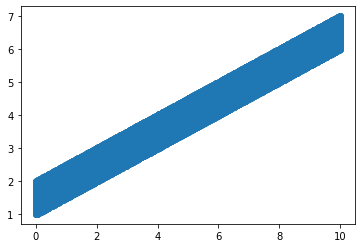

In [ ]:
#chech if backprop is correct for linear function
import matplotlib.pyplot as plt

def linear_func(x, k = 0.5, b = 1, eps = 1):
  return k * x + b + np.random.random() * eps


X = np.linspace(0, 10, 100000)
y = [linear_func(x, k = 0.5, b = 1) for x in X]

plt.scatter(X, y)

None

In [ ]:
losses = []
for x, y_ in zip(X, y):
  x = np.array([x])
  losses.append(net.train(x, y_, alpha=0.1).item())

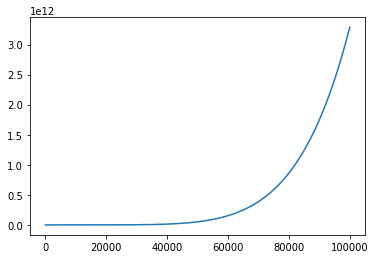

In [ ]:
plt.plot([i for i in range(len(losses))], losses)
None

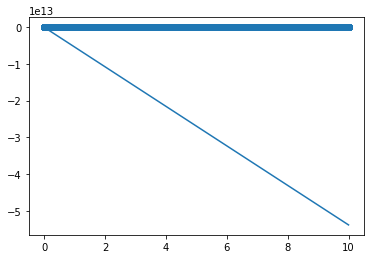

In [ ]:
#predict

plt.scatter(X, y)
plt.plot(X, [net.forward(np.array([x])).item() for x in X])
None